In [1]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [ -965  -905]
 [-1083  -915]
 [-1327 -1140]]
[-2.7691892e-03  4.4216989e-03 -6.7598419e-03 ... -4.7630747e+03
 -6.7653013e+03 -1.9577927e+03]
[-2.7691892e-03  4.4216989e-03 -6.7598419e-03 ... -4.7630747e+03
 -6.7653013e+03 -1.9577927e+03] 32000
[    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000. 15500. 16000.] 
 [0.0000000e+00 6.2500000e-04 1.2500000e-03 ... 3.7498750e+01 3.7499375e+01
 3.7500000e+01] 
 [[-1.2130554e-09+0.0000000e+00j  3.1685495e-08+0.0000000e+00j
   1.1303441e-04+0.0000000e+00j ...  5.0603515e-03+0.0000000e+00j
   5.8263023e-03+0.0000000e+00j -1.8280333e-02+0.0000000e+00j]
 [ 1.0514409e-09+9.3277686e-10j -5.0864513e-09+3.1594951e-08j
  -2.2560349e-04-2.2419190e-05j ... -1.8881034e-02+1.3266778e-02j
   9.7473655e-03-1.7503129e-02j  6.7004762e-03+1.44665

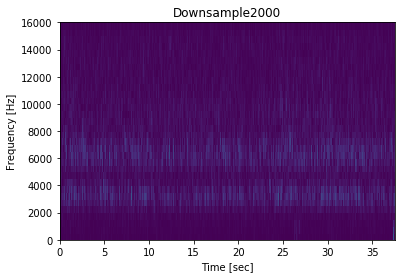

[    0.           0.           0.       ... -6725.3325      32.734356
   948.13934 ]
[    0.           0.           0.       ... -6725.3325      32.734356
   948.13934 ] 32000
[    0.   250.   500.   750.  1000.  1250.  1500.  1750.  2000.  2250.
  2500.  2750.  3000.  3250.  3500.  3750.  4000.  4250.  4500.  4750.
  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.
  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750.
 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000. 12250.
 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500. 14750.
 15000. 15250. 15500. 15750. 16000.] 
 [0.000000e+00 1.250000e-03 2.500000e-03 ... 7.499750e+01 7.499875e+01
 7.500000e+01] 
 [[-3.2331522e-14+0.00000000e+00j  3.1356617e-08+0.00000000e+00j
   1.1318440e-04+0.00000000e+00j ...  5.0599389e-03+0.00000000e+00j
   5.9315898e-03+0.00000000e+00j -1.7298507e-02+0.00000000e+00j]
 [ 1.5297227e-14-2.93265947e-14j -3.4025622e-09+3.08062695e-08j
  -2.255813

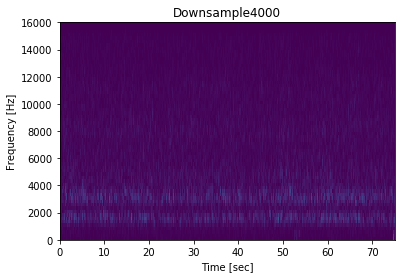

[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634]
[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634] 32000
[    0.   125.   250.   375.   500.   625.   750.   875.  1000.  1125.
  1250.  1375.  1500.  1625.  1750.  1875.  2000.  2125.  2250.  2375.
  2500.  2625.  2750.  2875.  3000.  3125.  3250.  3375.  3500.  3625.
  3750.  3875.  4000.  4125.  4250.  4375.  4500.  4625.  4750.  4875.
  5000.  5125.  5250.  5375.  5500.  5625.  5750.  5875.  6000.  6125.
  6250.  6375.  6500.  6625.  6750.  6875.  7000.  7125.  7250.  7375.
  7500.  7625.  7750.  7875.  8000.  8125.  8250.  8375.  8500.  8625.
  8750.  8875.  9000.  9125.  9250.  9375.  9500.  9625.  9750.  9875.
 10000. 10125. 10250. 10375. 10500. 10625. 10750. 10875. 11000. 11125.
 11250. 11375. 11500. 11625. 11750. 11875. 12000. 12125. 12250. 12375.
 12500. 12625. 12750. 12875. 13000. 13125. 13250. 13375. 13500. 13625.
 13750. 13875. 14000. 14125. 14250. 14375. 14500. 14625. 14750. 14875

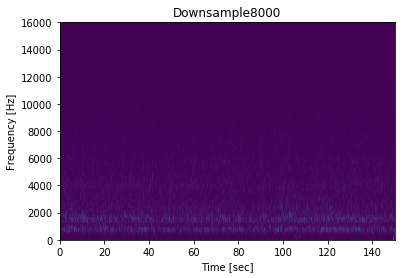

In [2]:
#do stft for the samples when the samples are downsized to 2000hz, 4000hz and 8000hz
#reason for downsizing
frequency = [2000,4000,8000]
powers = [64,128,256]
output = {}
sample_rate, samples = wavfile.read('BeeAudio1.wav')
print(samples)
for i in range(3):
    resampled = resample(samples[:,0].astype(np.float32),sample_rate,frequency[i])
    print(resampled)
    print(resampled,sample_rate)
    samples_casted = resampled / (2.**15)
    f, t, Zxx = signal.stft(samples_casted, fs = sample_rate, nperseg = frequency[i] / 40, noverlap = frequency[i] / 40 * 0.6, nfft = powers[i])
    print(f,'\n', t,'\n',Zxx)
    Zxx_abs = np.abs(Zxx)
    output[str(frequency[i])] = Zxx
    print(type(f), type(t), type(Zxx))
    plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Downsample' + str(frequency[i]))
    plt.show()

In [3]:
print(output['8000'].shape)

(129, 60001)


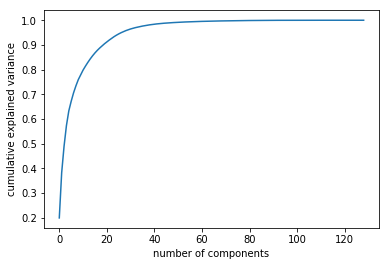

In [3]:
#output the PCA graph to determine the dimension numbers to save
from sklearn.decomposition import PCA
pca = PCA().fit(output['8000'].real)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [4]:
#choose n = 30 for PCA
output_real = np.abs(output['8000'].transpose())
# print(output_real)
pca = PCA(n_components = 30, svd_solver='full')
for_cluster = pca.fit_transform(output_real)
print(for_cluster[0], '\n', for_cluster.shape)
print(sum(pca.explained_variance_ratio_))

[-1.0093256e-01 -3.6427420e-02 -5.6445892e-03 -1.2215055e-02
 -3.7117999e-02 -2.7588889e-02 -9.6434299e-03 -2.6645254e-02
  9.8579777e-03  1.1160198e-02 -3.2687495e-03 -5.7621412e-03
  1.7391141e-05 -7.9954397e-03  3.7961302e-03  3.5998167e-03
  3.3760280e-03 -5.6334608e-03 -1.9125846e-03  1.6565018e-03
 -2.6202959e-04 -9.7205210e-04 -2.9884034e-04 -2.8886443e-03
 -4.2874613e-04 -3.1972947e-03  1.5438763e-04 -2.5169668e-03
  9.9240732e-04 -2.3634974e-03] 
 (60001, 30)
0.9521622133906931


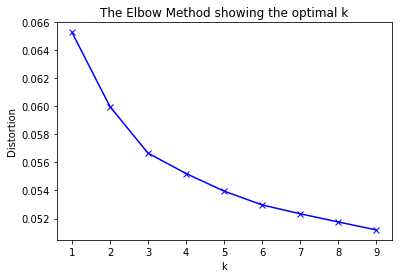

In [5]:
#elbow method to determine the optimal n_cluster for k-means cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(for_cluster)
    kmeanModel.fit(for_cluster)
    distortions.append(sum(np.min(cdist(for_cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / for_cluster.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(for_cluster)
print(kmeans.transform(for_cluster).shape)

(60001, 10)


In [7]:
labels_k = kmeans.labels_
print(labels_k, '\n', len(labels_k), '\n', kmeans.cluster_centers_)
centers = kmeans.cluster_centers_
indices = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
points = {i: for_cluster[np.where(kmeans.labels_ == i)] for i in range(kmeans.n_clusters)}
min_indices = {}
for i in range(kmeans.n_clusters):
    distances = [np.linalg.norm(a-centers[i]) for a in points[i]]
    min_indices[i] = distances.index(min(distances))
print(indices, '\n', points,'\n',min_indices)

[5 5 5 ... 1 6 7] 
 60001 
 [[ 9.63246543e-03 -1.95753276e-02  9.18984413e-03  2.10957229e-02
  -5.26224030e-03  5.82117122e-04  2.76854960e-04  1.48348417e-03
   5.09241305e-04 -2.59783526e-04 -7.26441096e-04 -4.38009825e-04
  -3.44867512e-05  3.41409002e-04  1.06634776e-04 -2.28213743e-04
   2.29721758e-04  2.10140090e-04  1.75769910e-05 -9.50457252e-05
  -1.02938786e-04  3.28971364e-05 -1.10171313e-04  1.76968024e-05
  -1.46922554e-04  4.66590282e-05  4.08970700e-05 -3.98975390e-05
   5.20968060e-05  1.19517827e-04]
 [-1.36614563e-02  2.03685295e-02  5.96985733e-03 -6.51717791e-03
  -1.10001024e-02  2.53259065e-03 -4.37333249e-04  7.84014584e-04
   3.71627859e-04 -6.49563328e-04 -6.65036845e-04  2.51888472e-04
   3.49602720e-04 -4.82916861e-04 -5.23521157e-04 -1.97329777e-04
  -2.72009318e-04 -8.58649510e-05  2.28069075e-05 -9.72888447e-05
  -1.00067336e-04  5.16131258e-05 -1.70200889e-04  1.37096373e-04
   1.13909751e-04  1.63383549e-04  9.97128154e-05  4.23617057e-05
  -3.31775809

In [8]:
import collections
print(labels_k,labels_k.shape)
collections_k = collections.Counter(labels_k)
print(collections_k)

[5 5 5 ... 1 6 7] (60001,)
Counter({5: 12266, 7: 8511, 1: 6885, 2: 6769, 0: 5708, 4: 4976, 9: 4874, 6: 3899, 8: 3522, 3: 2591})


In [11]:
#generate markov chain model
matrix = [[0 for x in range(10)] for y in range(10)] 
for i in range(len(labels_k)-1):
    matrix[labels_k[i]][labels_k[i+1]] += 1
    matrix_og = matrix[:]
for j in range(10):
    matrix[j] = [x / collections_k[j] for x in matrix_og[j]]
print(matrix_og, '\n', matrix)

[[1179, 525, 459, 349, 537, 844, 480, 656, 264, 415], [503, 1179, 910, 192, 574, 1612, 174, 797, 462, 482], [442, 873, 1433, 108, 404, 1513, 159, 813, 458, 566], [375, 190, 111, 492, 310, 113, 323, 199, 220, 258], [538, 599, 382, 331, 1021, 703, 226, 452, 427, 297], [859, 1565, 1485, 111, 703, 4663, 218, 1819, 352, 491], [514, 180, 166, 363, 197, 203, 988, 680, 148, 460], [647, 839, 815, 198, 460, 1801, 660, 2081, 272, 737], [254, 471, 485, 212, 451, 334, 137, 280, 534, 364], [397, 464, 523, 235, 319, 479, 534, 734, 385, 804]] 
 [[0.206552207428171, 0.09197617379117029, 0.08041345480028031, 0.06114225648213034, 0.09407848633496846, 0.14786264891380518, 0.08409250175192712, 0.11492641906096707, 0.046250875963559916, 0.07270497547302032], [0.07305737109658678, 0.17124183006535948, 0.13217138707334786, 0.027886710239651415, 0.08336964415395788, 0.23413217138707335, 0.025272331154684097, 0.11575889615105302, 0.06710239651416122, 0.07000726216412491], [0.06529768060274782, 0.128970305805879

In [12]:
#generate markov chain for 30 seconds
markov_generated = [5] + [0] * 2999
for i in range(len(markov_generated)):
    if i < 2999:
        prob_generated = np.random.random_sample()
        prob_comp,next_element = matrix[markov_generated[i]][0],0
        while(prob_generated > prob_comp):
            next_element+=1
            prob_comp += matrix[markov_generated[i]][next_element]
        markov_generated[i+1] = next_element
print(len(markov_generated),markov_generated)

3000 [5, 5, 0, 9, 2, 1, 2, 5, 7, 5, 4, 8, 0, 0, 8, 9, 7, 0, 0, 6, 6, 2, 1, 0, 7, 7, 5, 5, 1, 5, 8, 9, 0, 8, 5, 5, 0, 2, 0, 0, 0, 0, 5, 5, 2, 6, 6, 0, 4, 5, 0, 6, 2, 2, 2, 2, 8, 8, 4, 3, 6, 2, 7, 8, 9, 5, 4, 7, 2, 1, 5, 5, 4, 7, 5, 3, 4, 1, 7, 9, 7, 1, 3, 9, 6, 4, 8, 3, 6, 6, 6, 1, 8, 7, 1, 5, 0, 5, 5, 7, 2, 4, 4, 3, 7, 2, 2, 2, 9, 2, 5, 7, 0, 3, 3, 0, 5, 8, 8, 0, 4, 8, 4, 8, 3, 2, 2, 5, 5, 7, 4, 8, 6, 2, 8, 6, 7, 0, 9, 4, 8, 7, 5, 0, 3, 9, 4, 7, 9, 9, 9, 3, 2, 4, 3, 0, 0, 4, 5, 2, 5, 7, 7, 9, 6, 6, 8, 8, 6, 7, 7, 9, 3, 4, 7, 7, 6, 5, 3, 0, 5, 0, 2, 5, 1, 5, 5, 5, 6, 4, 4, 9, 7, 6, 1, 9, 8, 4, 4, 4, 9, 5, 8, 4, 4, 5, 2, 2, 3, 1, 6, 6, 0, 0, 1, 6, 9, 5, 5, 5, 0, 2, 2, 5, 5, 8, 9, 6, 2, 5, 5, 0, 4, 1, 2, 2, 9, 4, 0, 1, 4, 3, 1, 4, 4, 4, 3, 0, 8, 4, 8, 5, 2, 9, 7, 5, 5, 5, 2, 2, 1, 1, 2, 2, 9, 0, 0, 3, 3, 3, 0, 8, 1, 5, 5, 1, 8, 4, 9, 0, 9, 9, 6, 7, 5, 9, 7, 7, 7, 2, 2, 2, 2, 2, 1, 3, 2, 5, 5, 0, 0, 6, 9, 5, 1, 5, 7, 0, 2, 0, 1, 0, 7, 0, 0, 8, 8, 3, 9, 5, 2, 1, 7, 6, 3, 6, 6, 6, 2, 1, 1, 8

In [13]:
print(output['8000'].transpose()[0][:].shape)

(129,)


In [13]:
indices_sec = {0: 4048, 1: 63, 2: 3152, 3: 2588, 4: 851, 5: 7200, 6: 2407, 7: 4219, 8: 1929, 9: 1876}
windows_generated = np.array([[0, 0]])
# print(output_t.shape)
for i in range(3000):
    window_to_concat = samples[indices_sec[markov_generated[i]]*320 : (indices_sec[markov_generated[i]]+1)*320 ]
    windows_generated = np.concatenate((window_to_concat,windows_generated),axis = 0)

In [18]:
print(samples[indices_sec[markov_generated[0]]])

[-6604 -6592]


In [19]:
print(np.concatenate((samples[0],samples[1])))

[0 0 0 0]


In [20]:
print(samples[32000:32320].shape)
print(windows_generated.shape)

(320, 2)
(960001, 2)


In [18]:
print(windows_generated[0])

[-2444 -2497]


In [19]:
print(windows_generated/8000)

[[-0.3055   -0.312125]
 [-0.257    -0.278375]
 [-0.148625 -0.16625 ]
 ...
 [ 0.147     0.143625]
 [ 0.111     0.111875]
 [ 0.        0.      ]]


In [20]:
wavfile.write('BeeSoundGenerated1_1.wav', sample_rate, windows_generated/8000)